# Exploring grain settling with Python

Grain settling is one of the most important problems in sedimentology (and therefore sedimentary geology), as neither sediment transport nor deposition can be understood and modeled without knowing what is the settling velocity of a particle of a certain grain size. Very small grains, when submerged in water, have a mass small enough that they reach a terminal velocity before any turbulence develops. This is true for clay- and silt-sized particles settling in water, and for these grain size classes Stokes' Law can be used to calculate the settling velocity:

$$w = \frac{RgD^2}{C_1\nu}$$

where $R$ = specific submerged gravity, $g$ = gravitational acceleration, $D$ is the particle diameter, $C_1$ is a constant with a theoretical value of 18, and $\nu$ is the kinematic viscosity.

For grain sizes coarser than silt, a category that clearly includes a lot of sediment and rock types of great interest to geologists, things get more complicated. The reason for this is the development of a separation wake behind the falling grain; the appearance of this wake results in turbulence and large pressure differences between the front and back of the particle. For large grains - pebbles, cobbles - this effect is so strong that viscous forces become insignificant and turbulent drag dominates; the settling velocity can be estimated using the empirical equation

$$w = \sqrt{\frac{4RgD}{3C_2}}$$

The important point is that, for larger grains, the settling velocity increases more slowly, with the square root of the grain size, as opposed to the square of particle diameter, as in Stokes' Law.

Sand grains are small enough that viscous forces still play an important role in their subaqueous settling behavior, but large enough that the departure from Stokes' Law is significant and wake turbulence cannot be ignored. There are several empirical - and fairly complicated - equations that try to bridge this gap; here I focus on the simplest one, published in 2004 in the Journal of Sedimentary Research (Ferguson and Church, 2004):
    
$$w = \frac{RgD^2}{C_1\nu+\sqrt{0.75C_2RgD^3}}$$

At small values of D, the left term in the denominator is much larger than the one containing the third power of D, and the equation is equivalent of Stokes' Law. At large values of D, the second term dominates and the settling velocity converges to the solution of the turbulent drag equation.

But the point of this blog post is not to give a summary of the Ferguson and Church paper; what I am interested in is to write some simple code and plot settling velocity against grain size to better understand these relationships through exploring them graphically. So what follows is a series of Python code snippets, directly followed by the plots that you can generate if you run the code yourself. I have done this using the IPython notebook, a very nice tool that allows and promotes note taking, coding, and plotting within one document. I am not going to get into details of Python programming and the usage of IPython notebook, but you can check them out for example <a href="http://ipython.org/notebook.html">here</a>.

First we have to implement the three equations as Python functions:

In [40]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

rop = 2650.0 # density of particle in kg/m3
rof = 1000.0 # density of fluid in kg/m3
visc = 1.002*1E-3 #8.9*1E-4 # dynamic viscosity in Pa*s (N*s/m^2)
C1 = 18 # constant in Ferguson-Church equation
C2 = 1 # constant in Ferguson-Church equation, valid for natural sand grains

def v_stokes(rop,rof,d,visc,C1):
        R = (rop-rof)/rof # submerged specific gravity
        w = R*9.81*(d**2)/(C1*visc/rof)
        return w

def v_turbulent(rop,rof,d,visc,C2):
        R = (rop-rof)/rof 
        w = (4*R*9.81*d/(3*C2))**0.5
        return w

def v_ferg(rop,rof,d,visc,C1,C2):
        R = (rop-rof)/rof 
        w = (R*9.81*d**2)/(C1*visc/rof+(0.75*C2*R*9.81*d**3)**0.5)
        return w

Let's plot these equations for a range of particle diameters:

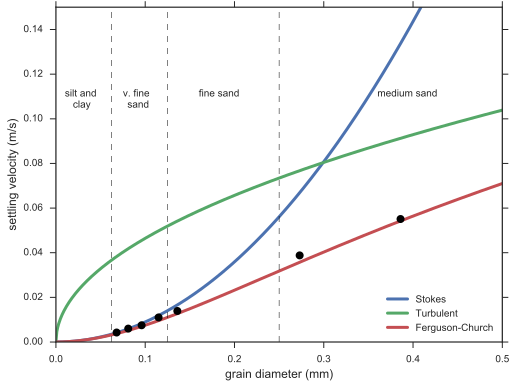

In [42]:
d = np.arange(0,0.0005,0.000001)
ws = v_stokes(rop,rof,d,visc,C1)
wt = v_turbulent(rop,rof,d,visc,C2)
wf = v_ferg(rop,rof,d,visc,C1,C2)

plt.figure(figsize=(8,6))
sns.set_style("white")
sns.set_style("ticks")
plt.plot(d*1000,ws,label='Stokes',linewidth=3)
plt.plot(d*1000,wt,label='Turbulent',linewidth=3)
plt.plot(d*1000,wf,label='Ferguson-Church',linewidth=3)
plt.plot([0.25, 0.25],[0, 0.15],'k--',linewidth=0.5)
plt.plot([0.25/2.0, 0.25/2.0],[0, 0.15],'k--',linewidth=0.5)
plt.plot([0.25/4.0, 0.25/4.0],[0, 0.15],'k--',linewidth=0.5)
plt.text(0.36, 0.11, 'medium sand', fontsize=10)
plt.text(0.16, 0.11, 'fine sand', fontsize=10)
plt.text(0.075, 0.11, 'v. fine', fontsize=10)
plt.text(0.08, 0.105, 'sand', fontsize=10)
plt.text(0.01, 0.11, 'silt and', fontsize=10)
plt.text(0.019, 0.105, 'clay', fontsize=10)
plt.legend(loc=4, fontsize=10)
plt.xlabel('grain diameter (mm)',fontsize=12)
plt.ylabel('settling velocity (m/s)',fontsize=12)
plt.axis([0,0.5,0,0.15])

D = [0.068, 0.081, 0.096, 0.115, 0.136, 0.273, 0.386, 0.55, 0.77, 1.09, 2.18, 4.36]
w = [0.00425, 0.0060, 0.0075, 0.0110, 0.0139, 0.0388, 0.0551, 0.0729, 0.0930, 0.141, 0.209, 0.307]
err = [0.00009, 0.0001, 0.0001, 0.0002, 0.0001, 0.0002, 0.0005, 0.0010, 0.0016, 0.002, 0.002, 0.003]
plt.plot(D,w,'ko',markersize=8);

The black dots are data points from settling experiments performed with natural river sands (Table 2 in Ferguson and Church, 2004). It is obvious that the departure from Stokes' Law is already significant for very fine sand and Stokes settling is completely inadequate for describing the settling of medium sand.

This plot only captures particle sizes finer than medium sand; let's see what happens as we move to coarser sediment.

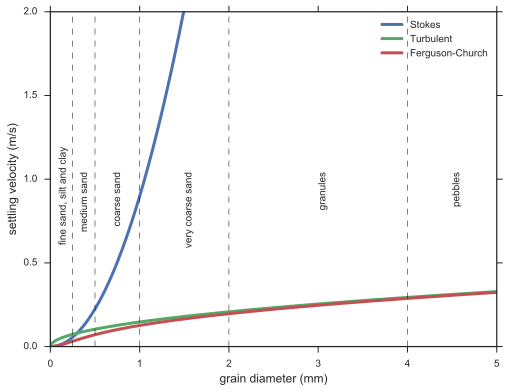

In [43]:
d = np.arange(0,0.01,0.00001)
ws = v_stokes(rop,rof,d,visc,C1)
wt = v_turbulent(rop,rof,d,visc,C2)
wf = v_ferg(rop,rof,d,visc,C1,C2)
plt.figure(figsize=(8,6))
plt.plot(d*1000,ws,label='Stokes',linewidth=3)
plt.plot(d*1000,wt,label='Turbulent',linewidth=3)
plt.plot(d*1000,wf,label='Ferguson-Church',linewidth=3)
plt.plot([0.25, 0.25],[0, 2],'k--',linewidth=0.5)
plt.plot([0.5, 0.5],[0, 2],'k--',linewidth=0.5)
plt.text(0.33, 1.0, 'medium sand', fontsize=10, rotation='vertical')
plt.text(0.09, 1.15, 'fine sand, silt and clay', fontsize=10, rotation='vertical')
plt.plot([1, 1],[0, 2],'k--',linewidth=0.5)
plt.text(0.7, 1.0, 'coarse sand', fontsize=10, rotation='vertical')
plt.plot([2, 2],[0, 2],'k--',linewidth=0.5)
plt.text(1.5, 1.0, 'very coarse sand', fontsize=10, rotation='vertical')
plt.plot([4, 4],[0, 2],'k--',linewidth=0.5)
plt.text(3, 1.0, 'granules', fontsize=10, rotation='vertical')
plt.text(4.5, 1.0, 'pebbles', fontsize=10, rotation='vertical')
plt.legend(loc=1, fontsize=10)
plt.xlabel('grain diameter (mm)',fontsize=12)
plt.ylabel('settling velocity (m/s)',fontsize=12)
plt.axis([0,5,0,2]);

A log-log plot is much better for looking at a wide spectrum of grain sizes.

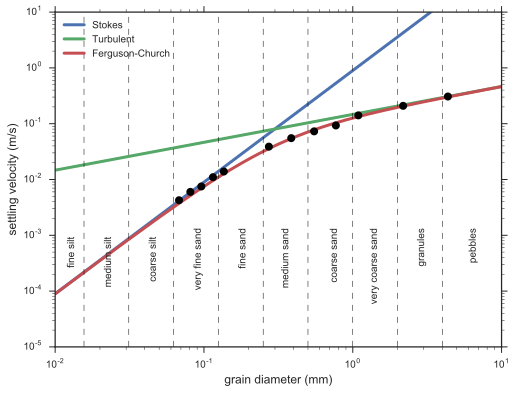

In [44]:
d = np.arange(0,0.01,0.00001)
ws = v_stokes(rop,rof,d,visc,C1)
wt = v_turbulent(rop,rof,d,visc,C2)
wf = v_ferg(rop,rof,d,visc,C1,C2)
plt.figure(figsize=(8,6))
plt.loglog(d*1000,ws,label='Stokes',linewidth=3)
plt.loglog(d*1000,wt,label='Turbulent',linewidth=3)
plt.loglog(d*1000,wf,label='Ferguson-Church',linewidth=3)
plt.plot([1.0/64, 1.0/64],[0.00001, 10],'k--',linewidth=0.5)
plt.text(0.012, 0.0007, 'fine silt', fontsize=10, rotation='vertical')
plt.plot([1.0/32, 1.0/32],[0.00001, 10],'k--',linewidth=0.5)
plt.text(0.17/8, 0.0007, 'medium silt', fontsize=10, rotation='vertical')
plt.plot([1.0/16, 1.0/16],[0.00001, 10],'k--',linewidth=0.5)
plt.text(0.17/4, 0.0007, 'coarse silt', fontsize=10, rotation='vertical')
plt.plot([1.0/8, 1.0/8],[0.00001, 10],'k--',linewidth=0.5)
plt.text(0.17/2, 0.001, 'very fine sand', fontsize=10, rotation='vertical')
plt.plot([0.25, 0.25],[0.00001, 10],'k--',linewidth=0.5)
plt.text(0.17, 0.001, 'fine sand', fontsize=10, rotation='vertical')
plt.plot([0.5, 0.5],[0.00001, 10],'k--',linewidth=0.5)
plt.text(0.33, 0.001, 'medium sand', fontsize=10, rotation='vertical')
plt.plot([1, 1],[0.00001, 10],'k--',linewidth=0.5)
plt.text(0.7, 0.001, 'coarse sand', fontsize=10, rotation='vertical')
plt.plot([2, 2],[0.00001, 10],'k--',linewidth=0.5)
plt.text(1.3, 0.001, 'very coarse sand', fontsize=10, rotation='vertical')
plt.plot([4, 4],[0.00001, 10],'k--',linewidth=0.5)
plt.text(2.7, 0.001, 'granules', fontsize=10, rotation='vertical')
plt.text(6, 0.001, 'pebbles', fontsize=10, rotation='vertical')
plt.legend(loc=2, fontsize=10)
plt.xlabel('grain diameter (mm)', fontsize=12)
plt.ylabel('settling velocity (m/s)', fontsize=12)
plt.axis([0,10,0,10])
plt.plot(D,w,'o',markerfacecolor=[0.0, 0.0, 0.0], markersize=8);

This plot shows how neither Stokes' Law, nor the velocity based on turbulent drag are valid for calculating settling velocities of sand-size grains in water, whereas the Ferguson-Church equation provides a good fit for natural river sand.

Grain settling is a special case of the more general problem of flow past a sphere. The analysis and plots above are all dimensional, that is, you can quickly check by looking at the plots what is the approximate settling velocity of very fine sand. That is great, but you would have to generate a new plot - and potentially do a new experiment - if you wanted to look at the behavior of particles in some other fluid than water. A more general treatment of the problem involves dimensionless variables; in this case these variables are the Reynolds number and the drag coefficient. The classic diagram for flow past a sphere is a plot of the drag coefficient against the Reynolds number. I will try to reproduce this plot, using settling velocities that come from the three equations above.

At terminal settling velocity, the drag force equals the gravitational force acting on the grain:

$$F_d = F_g$$

We also know that the gravitational force is given by the submerged weight of the grain:

$$F_g = (\rho_p-\rho_f)\frac{4}{3}\pi r^3g$$

The drag coefficient is essentially a dimensionless version of the drag force:

$$C_d = \frac{F_d}{\frac{\rho_fw^2}{2}A} =\frac{F_d}{\rho_fw^2\pi\frac{d^2}{8}}$$

At terminal settling velocity, the particle Reynolds number is

$$Re = \frac{\rho_fwd}{\mu}$$

Using these relationships it is possible to generate the plot of drag coefficient vs. Reynolds number:

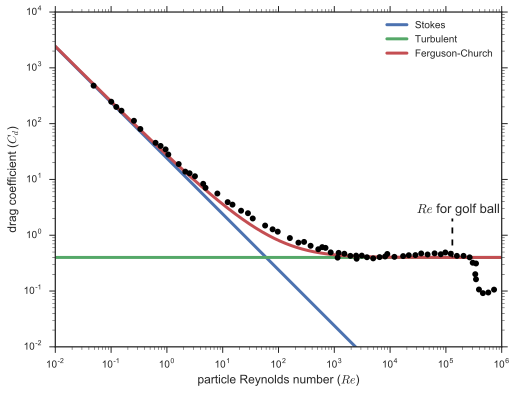

In [35]:
d = np.arange(0.000001,0.3,0.00001)
C2 = 0.4 # this constant is 0.4 for spheres, 1 for natural grains
ws = v_stokes(rop,rof,d,visc,C1)
wt = v_turbulent(rop,rof,d,visc,C2)
wf = v_ferg(rop,rof,d,visc,C1,C2)
Fd = (rop-rof)*4/3*pi*((d/2)**3)*9.81 # drag force
Cds = Fd/(rof*ws**2*pi*(d**2)/8) # drag coefficient
Cdt = Fd/(rof*wt**2*pi*(d**2)/8)
Cdf = Fd/(rof*wf**2*pi*(d**2)/8)
Res = rof*ws*d/visc # particle Reynolds number
Ret = rof*wt*d/visc
Ref = rof*wf*d/visc
plt.figure(figsize=(8,6))
plt.loglog(Res,Cds,linewidth=3, label='Stokes')
plt.loglog(Ret,Cdt,linewidth=3, label='Turbulent')
plt.loglog(Ref,Cdf,linewidth=3, label='Ferguson-Church')
# data digitized from Southard textbook, figure 2-2:
Re_exp = [0.04857,0.10055,0.12383,0.15332,0.25681,0.3343,0.62599,0.77049,0.94788,1.05956,
       1.62605,2.13654,2.55138,3.18268,4.46959,4.92143,8.02479,12.28672,14.97393,21.33792,
       28.3517,34.55246,57.57204,78.3929,96.88149,159.92596,227.64082,287.31738,375.98547,
       516.14355,607.03827,695.8316,861.51953,1147.26099,1194.43213,1513.70166,1939.70557,
       2511.91235,2461.13232,3106.32397,3845.99561,4974.59424,6471.96875,8135.45166,8910.81543,
       11949.91309,17118.62109,21620.08203,28407.60352,36064.10156,46949.58594,62746.32422,
       80926.54688,97655.00781,122041.875,157301.8125,206817.7188,266273,346423.5938,302216.5938,
       335862.5313,346202,391121.5938,460256.375,575194.4375,729407.625]
Cd_exp = [479.30811,247.18175,199.24072,170.60068,112.62481,80.21341,45.37168,39.89885,34.56996,
       28.01445,18.88166,13.80322,12.9089,11.41266,8.35254,7.08445,5.59686,3.92277,3.53845,
       2.75253,2.48307,1.99905,1.49187,1.27743,1.1592,0.89056,0.7368,0.75983,0.64756,0.56107,
       0.61246,0.5939,0.49308,0.39722,0.48327,0.46639,0.42725,0.37951,0.43157,0.43157,0.40364,
       0.3854,0.40577,0.41649,0.46173,0.41013,0.42295,0.43854,0.44086,0.4714,0.45225,0.47362,
       0.45682,0.49104,0.46639,0.42725,0.42725,0.40171,0.31214,0.32189,0.20053,0.16249,0.10658,
       0.09175,0.09417,0.10601]
plt.loglog(Re_exp, Cd_exp, 'o', markerfacecolor = [0.0, 0.0, 0.0], markersize=6)

# Reynolds number for golf ball:
rof_air = 1.2041 # density of air at 20 degrees C
u = 50 # velocity of golf ball (m/s)
d = 0.043 # diameter of golf ball (m)
visc_air = 1.983e-5 # dynamic viscosity of air at 20 degrees C
Re = rof_air*u*d/visc_air
plt.loglog([Re, Re], [0.4, 2], 'k--')
plt.text(3e4,2.5,'$Re$ for golf ball',fontsize=13)
plt.legend(loc=1, fontsize=10)
plt.axis([1e-2,1e6,1e-2,1e4])
plt.xlabel('particle Reynolds number ($Re$)', fontsize=12)
plt.ylabel('drag coefficient ($C_d$)', fontsize=12);

The black dots are experimental data points digitized from the <a href="http://ocw.mit.edu/courses/earth-atmospheric-and-planetary-sciences/12-110-sedimentary-geology-spring-2007/index.htm">excellent textbook by John Southard</a>, available through MIT Open Courseware. As turbulence becomes dominant at larger Reynolds numbers, the drag coefficient converges to a constant value (which is equal to C2 in the equations above). Note however the departure of the experimental data from this ideal horizontal line: at high Reynolds numbers there is a sudden drop in drag coefficient as the laminar boundary layer becomes turbulent and the flow separation around the particle is delayed, that is, pushed toward the back; the separation wake becomes smaller and the turbulent drag decreases. Golf balls are not big enough to reach this point without some additional 'help'; this help comes from the dimples on the surface of the ball that make the boundary layer turbulent and reduce the wake.

<strong>References</strong>

Ferguson, R. and Church, M. (2004) A simple universal equation for grain settling velocity. Journal of Sedimentary Research 74, 933–937, http://dx.doi.org/10.1306/051204740933.